In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime

In [2]:
cab_data = pd.read_csv('Cab_Data.csv', sep = ",")

In [3]:
city_data = pd.read_csv('City.csv' , sep = ",")
customer_data = pd.read_csv('Customer_ID.csv' , sep = ",")
transaction_data = pd.read_csv('Transaction_ID.csv' , sep = ",")

In [4]:
cab_data.shape

(359392, 7)

In [5]:
city_data.shape

(20, 3)

In [6]:
customer_data.shape

(49171, 4)

In [7]:
transaction_data.shape

(440098, 3)

In [8]:
merged_df1 = pd.merge(cab_data, city_data, on='City')

In [9]:
merged_df2 = pd.merge(merged_df1, transaction_data, on='Transaction ID')

In [10]:
df = pd.merge(merged_df2, customer_data, on='Customer ID')

In [11]:
df.shape

(359392, 14)

In [12]:
df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,"814,885","24,701",29290,Card,Male,28,10813
1,10351127,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,"814,885","24,701",29290,Cash,Male,28,10813
2,10412921,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,"814,885","24,701",29290,Card,Male,28,10813
3,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,"814,885","24,701",27703,Card,Male,27,9237
4,10320494,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,"814,885","24,701",27703,Card,Male,27,9237


In [13]:
df.duplicated().sum().any()

False

In [14]:
df.isnull().sum().any()

False

In [15]:
from datetime import datetime, timedelta
from datetime import datetime
import datetime as dt

In [16]:
df['Date of Travel'] = datetime(1899,12,29) + df['Date of Travel'].map(dt.timedelta)

In [17]:
for col in df.columns:
    if ' ' in col:
        df = df.rename(columns={col:col.replace(' ','_')})

In [18]:
years =[]
for i in range(len(df['Date_of_Travel'])):
    years.append(df['Date_of_Travel'][i].year)
df['Year'] = years

In [19]:
Age_Group =[]
for i in range(len(df['Age'])):
    if df['Age'][i] <= 20:
        Age_Group.append('Under 20')
    elif df['Age'][i] > 20 and df['Age'][i] <= 30:
        Age_Group.append('21 - 30')
    elif df['Age'][i] > 30 and df['Age'][i] <= 40:
        Age_Group.append('31 - 40')
    elif df['Age'][i] > 40 and df['Age'][i] <= 50:
        Age_Group.append('41 - 50')
    elif df['Age'][i] > 50 and df['Age'][i] <= 60:
        Age_Group.append('51 - 60')
    else:
        Age_Group.append('Above 60')
df['Age_Group'] = Age_Group

In [20]:
Income_Group =[]
for i in range(len(df['Income_(USD/Month)'])):
    if df['Income_(USD/Month)'][i] <= 5000:
        Income_Group.append('Under 5000')
    elif df['Income_(USD/Month)'][i] > 5000 and df['Income_(USD/Month)'][i] <= 10000:
        Income_Group.append('5000 - 10000')
    elif df['Income_(USD/Month)'][i] > 10000 and df['Income_(USD/Month)'][i] <= 20000:
        Income_Group.append('10000 - 20000')
    elif df['Income_(USD/Month)'][i] > 20000 and df['Income_(USD/Month)'][i] <= 30000:
        Income_Group.append('20000 - 30000')
    else:
        Income_Group.append('Above 30000')
df['Income_Group'] = Income_Group

In [21]:
df

,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Population,Users,Customer_ID,Payment_Mode,Gender,Age,Income_(USD/Month),Year,Age_Group,Income_Group
0,10000011,2016-01-07,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,"814,885","24,701",29290,Card,Male,28,10813,2016,21 - 30,10000 - 20000
1,10351127,2018-07-20,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,"814,885","24,701",29290,Cash,Male,28,10813,2018,21 - 30,10000 - 20000
2,10412921,2018-11-22,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,"814,885","24,701",29290,Card,Male,28,10813,2018,21 - 30,10000 - 20000
3,10000012,2016-01-05,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,"814,885","24,701",27703,Card,Male,27,9237,2016,21 - 30,5000 - 10000
4,10320494,2018-04-20,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,"814,885","24,701",27703,Card,Male,27,9237,2018,21 - 30,5000 - 10000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10307228,2018-03-02,Yellow Cab,WASHINGTON DC,38.40,668.93,525.3120,"418,859","127,001",51406,Cash,Female,29,6829,2018,21 - 30,5000 - 10000
359388,10319775,2018-04-12,Yellow Cab,WASHINGTON DC,3.57,67.60,44.5536,"418,859","127,001",51406,Cash,Female,29,6829,2018,21 - 30,5000 - 10000
359389,10347676,2018-07-05,Yellow Cab,WASHINGTON DC,23.46,331.97,337.8240,"418,859","127,001",51406,Card,Female,29,6829,2018,21 - 30,5000 - 10000
359390,10358624,2018-08-01,Yellow Cab,WASHINGTON DC,27.60,358.23,364.3200,"418,859","127,001",51406,Cash,Female,29,6829,2018,21 - 30,5000 - 10000


In [22]:
PinkCab = df[df['Company']=='Pink Cab']
YellowCab = df[df['Company']=='Yellow Cab']

In [23]:
PinkCab.head()

,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Population,Users,Customer_ID,Payment_Mode,Gender,Age,Income_(USD/Month),Year,Age_Group,Income_Group
0,10000011,2016-01-07,Pink Cab,ATLANTA GA,30.45,370.95,313.635,"814,885","24,701",29290,Card,Male,28,10813,2016,21 - 30,10000 - 20000
3,10000012,2016-01-05,Pink Cab,ATLANTA GA,28.62,358.52,334.854,"814,885","24,701",27703,Card,Male,27,9237,2016,21 - 30,5000 - 10000
6,10395626,2018-10-26,Pink Cab,ATLANTA GA,13.39,167.03,141.934,"814,885","24,701",27703,Card,Male,27,9237,2018,21 - 30,5000 - 10000
7,10000013,2016-01-01,Pink Cab,ATLANTA GA,9.04,125.20,97.632,"814,885","24,701",28712,Cash,Male,53,11242,2016,51 - 60,10000 - 20000
11,10000014,2016-01-06,Pink Cab,ATLANTA GA,33.17,377.40,351.602,"814,885","24,701",28020,Cash,Male,23,23327,2016,21 - 30,20000 - 30000


In [24]:
YellowCab.head()

,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Population,Users,Customer_ID,Payment_Mode,Gender,Age,Income_(USD/Month),Year,Age_Group,Income_Group
1,10351127,2018-07-20,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,"814,885","24,701",29290,Cash,Male,28,10813,2018,21 - 30,10000 - 20000
2,10412921,2018-11-22,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,"814,885","24,701",29290,Card,Male,28,10813,2018,21 - 30,10000 - 20000
4,10320494,2018-04-20,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,"814,885","24,701",27703,Card,Male,27,9237,2018,21 - 30,5000 - 10000
5,10324737,2018-05-03,Yellow Cab,ATLANTA GA,6.18,138.40,87.5088,"814,885","24,701",27703,Cash,Male,27,9237,2018,21 - 30,5000 - 10000
8,10079404,2016-09-20,Yellow Cab,ATLANTA GA,39.60,704.30,494.2080,"814,885","24,701",28712,Card,Male,53,11242,2016,51 - 60,10000 - 20000


In [25]:
PinkCab_distance = PinkCab['KM_Travelled'].describe()
YellowCab_distance = YellowCab['KM_Travelled'].describe()

In [26]:
df = pd.DataFrame({'PinkCab': PinkCab_distance.values,
                  'YellowCab': YellowCab_distance.values},
                  index= ['Count', 'Mean', 'Std. Dev.', 'Min', '25%', '50%', '75%', 'Max'])
df

,PinkCab,YellowCab
Count,84711.000000,274681.000000
Mean,22.559917,22.569517
Std. Dev.,12.231092,12.234298
Min,1.900000,1.900000
25%,12.000000,11.990000
50%,22.440000,22.440000
75%,32.960000,32.960000
Max,48.000000,48.000000


In [27]:
plot1 = PinkCab.groupby(['Gender']).Transaction_ID.count()
plot1

Gender
Female    37480
Male      47231
Name: Transaction_ID, dtype: int64

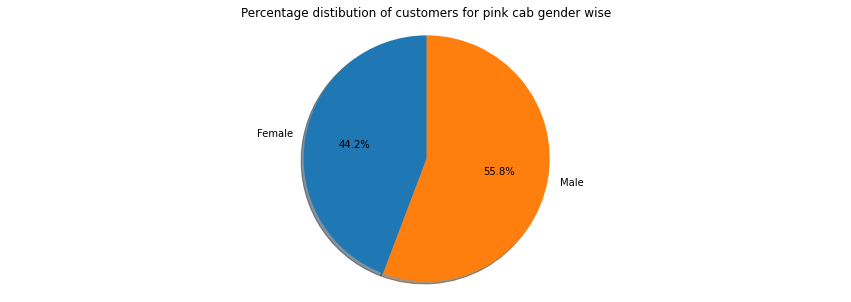

In [28]:
labs = plot1.index
vals = plot1.values
figp, axp = plt.subplots(figsize=(15,5))
axp.pie(vals , labels=labs, autopct='%1.1f%%', shadow=True, startangle=90,)
axp.axis('equal')

plt.title('Percentage distibution of customers for pink cab gender wise')
plt.show()

In [29]:
plot2 = YellowCab.groupby(['Gender']).Transaction_ID.count()
plot2

Gender
Female    116000
Male      158681
Name: Transaction_ID, dtype: int64

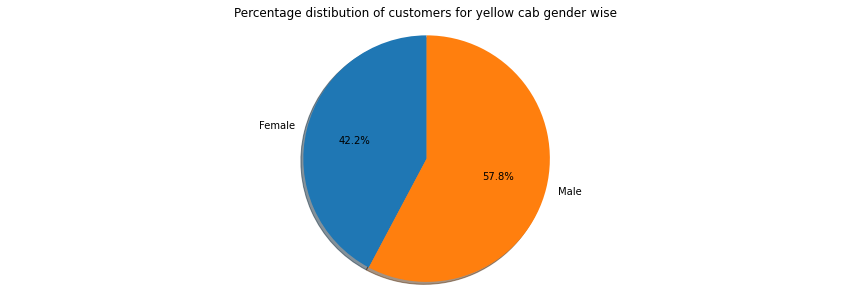

In [30]:
labs = plot2.index
vals = plot2.values
figp, axp = plt.subplots(figsize=(15,5))
axp.pie(vals , labels=labs, autopct='%1.1f%%', shadow=True, startangle=90,)
axp.axis('equal')

plt.title('Percentage distibution of customers for yellow cab gender wise')
plt.show()

In [31]:
plot3 = PinkCab.groupby(['Age_Group']).Transaction_ID.count()
plot3

Age_Group
21 - 30     27203
31 - 40     26556
41 - 50      9119
51 - 60      8897
Above 60     4586
Under 20     8350
Name: Transaction_ID, dtype: int64

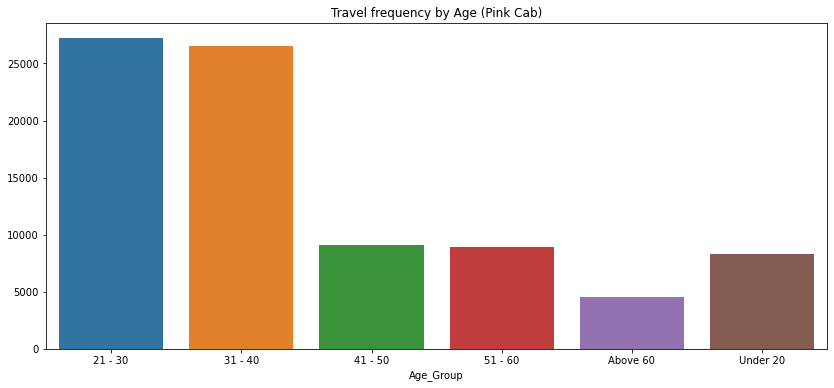

In [32]:
plt.figure(figsize=(14,6))
sns.barplot(x=plot3.index,y=plot3.values)
plt.title('Travel frequency by Age (Pink Cab)')
plt.show()

In [33]:
plot4 = YellowCab.groupby(['Age_Group']).Transaction_ID.count()
plot4

Age_Group
21 - 30     88163
31 - 40     86550
41 - 50     30451
51 - 60     28876
Above 60    14325
Under 20    26316
Name: Transaction_ID, dtype: int64

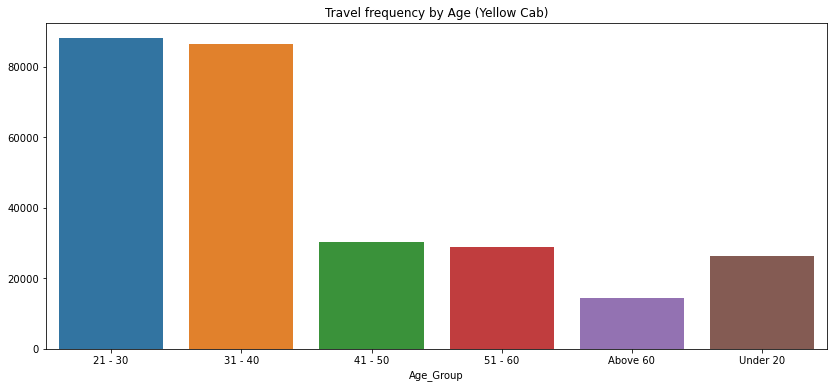

In [34]:
plt.figure(figsize=(14,6))
sns.barplot(x=plot4.index,y=plot4.values)
plt.title('Travel frequency by Age (Yellow Cab)')
plt.show()

In [35]:
plot5 = PinkCab.groupby(['Payment_Mode']).Transaction_ID.count()
plot5

Payment_Mode
Card    50719
Cash    33992
Name: Transaction_ID, dtype: int64

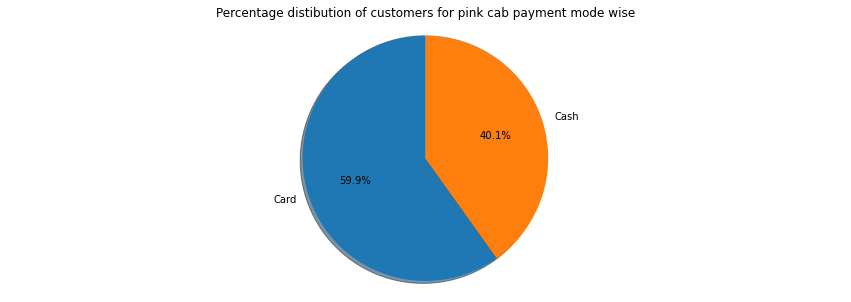

In [36]:
labs = plot5.index
vals = plot5.values
figp, axp = plt.subplots(figsize=(15,5))
axp.pie(vals , labels=labs, autopct='%1.1f%%', shadow=True, startangle=90,)
axp.axis('equal')

plt.title('Percentage distibution of customers for pink cab payment mode wise')
plt.show()

In [37]:
plot6 = YellowCab.groupby(['Payment_Mode']).Transaction_ID.count()
plot6

Payment_Mode
Card    164785
Cash    109896
Name: Transaction_ID, dtype: int64

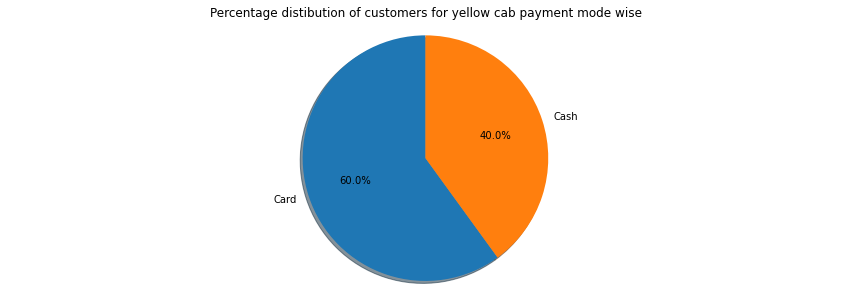

In [38]:
labs = plot6.index
vals = plot6.values
figp, axp = plt.subplots(figsize=(15,5))
axp.pie(vals , labels=labs, autopct='%1.1f%%', shadow=True, startangle=90,)
axp.axis('equal')

plt.title('Percentage distibution of customers for yellow cab payment mode wise')
plt.show()

In [39]:
plot7 = PinkCab.groupby(['Income_Group']).Transaction_ID.count()
plot7

Income_Group
10000 - 20000    33269
20000 - 30000    20802
5000 - 10000     16585
Above 30000       3938
Under 5000       10117
Name: Transaction_ID, dtype: int64

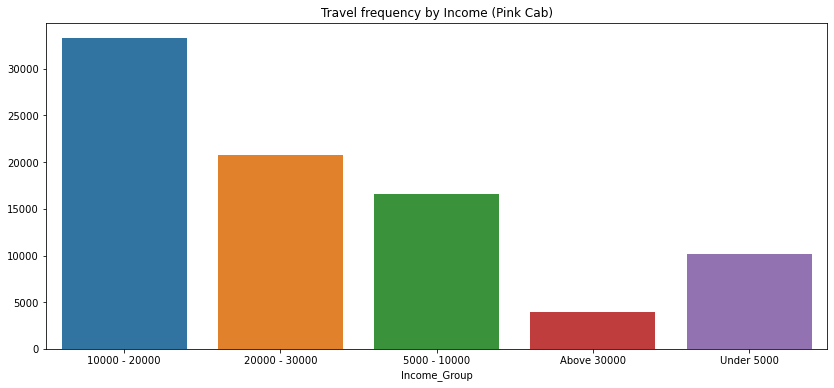

In [40]:
plt.figure(figsize=(14,6))
sns.barplot(x=plot7.index,y=plot7.values)
plt.title('Travel frequency by Income (Pink Cab)')
plt.show()

In [41]:
plot8 = YellowCab.groupby(['Income_Group']).Transaction_ID.count()
plot8

Income_Group
10000 - 20000    109165
20000 - 30000     66883
5000 - 10000      53675
Above 30000       12625
Under 5000        32333
Name: Transaction_ID, dtype: int64

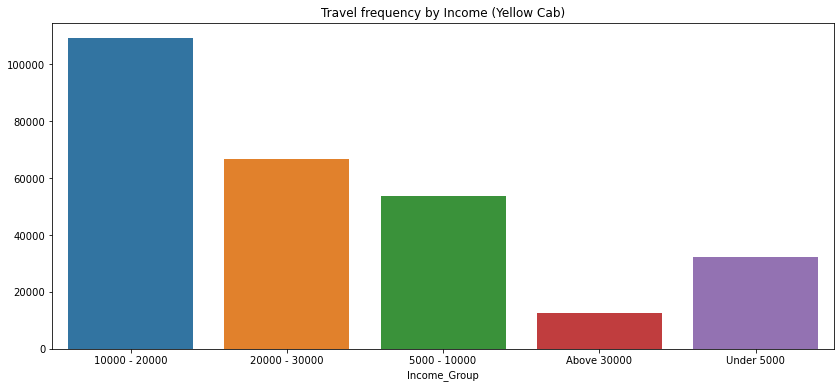

In [42]:
plt.figure(figsize=(14,6))
sns.barplot(x=plot8.index,y=plot8.values)
plt.title('Travel frequency by Income (Yellow Cab)')
plt.show()

In [43]:
plot9 = PinkCab[PinkCab.Company=='Pink Cab'].groupby(['City']).Transaction_ID.count()
plot9

City
ATLANTA GA         1762
AUSTIN TX          1868
BOSTON MA          5186
CHICAGO IL         9361
DALLAS TX          1380
DENVER CO          1394
LOS ANGELES CA    19865
MIAMI FL           2002
NASHVILLE TN       1841
NEW YORK NY       13967
ORANGE COUNTY      1513
PHOENIX AZ          864
PITTSBURGH PA       682
SACRAMENTO CA      1334
SAN DIEGO CA      10672
SEATTLE WA         2732
SILICON VALLEY     3797
TUCSON AZ           799
WASHINGTON DC      3692
Name: Transaction_ID, dtype: int64

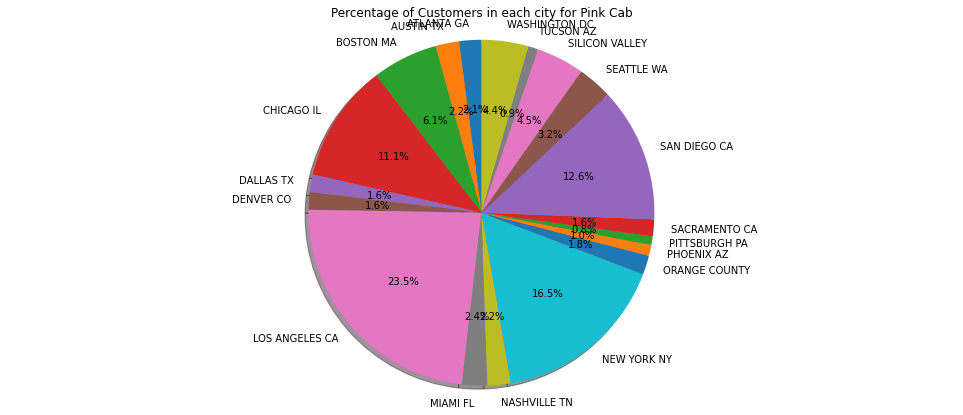

In [44]:
labs = plot9.index
vals = plot9.values
figp, axp = plt.subplots(figsize=(17,7))
axp.pie(vals , labels=labs, autopct='%1.1f%%', shadow=True, startangle=90,)
axp.axis('equal')

plt.title('Percentage of Customers in each city for Pink Cab')
plt.show()

In [45]:
plot10 = YellowCab.groupby(['City']).Transaction_ID.count()
plot10

City
ATLANTA GA         5795
AUSTIN TX          3028
BOSTON MA         24506
CHICAGO IL        47264
DALLAS TX          5637
DENVER CO          2431
LOS ANGELES CA    28168
MIAMI FL           4452
NASHVILLE TN       1169
NEW YORK NY       85918
ORANGE COUNTY      2469
PHOENIX AZ         1200
PITTSBURGH PA       631
SACRAMENTO CA      1033
SAN DIEGO CA       9816
SEATTLE WA         5265
SILICON VALLEY     4722
TUCSON AZ          1132
WASHINGTON DC     40045
Name: Transaction_ID, dtype: int64

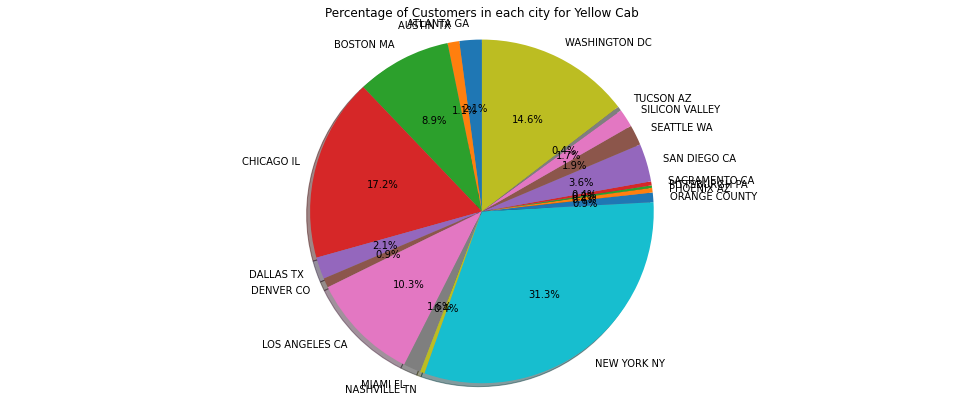

In [46]:
labs = plot10.index
vals = plot10.values
figp, axp = plt.subplots(figsize=(17,7))
axp.pie(vals , labels=labs, autopct='%1.1f%%', shadow=True, startangle=90,)
axp.axis('equal')

plt.title('Percentage of Customers in each city for Yellow Cab')
plt.show()

In [47]:
plot11 = PinkCab.groupby('Year').Transaction_ID.count()
plot11

Year
2016    25285
2017    30205
2018    29221
Name: Transaction_ID, dtype: int64

In [48]:
plot12 = YellowCab.groupby('Year').Transaction_ID.count()
plot12

Year
2016    82937
2017    97759
2018    93985
Name: Transaction_ID, dtype: int64

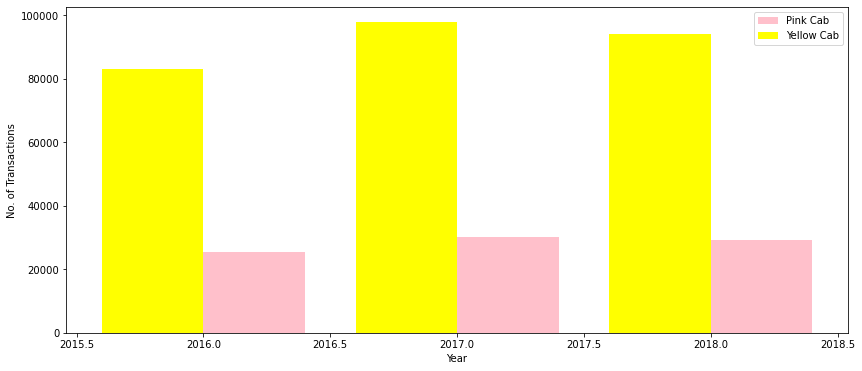

In [49]:
plt.figure(figsize=(14,6))
ax = plt.subplot(111)
ax.bar(plot11.index+0.2, plot11.values, width=0.4, color='pink', align='center',label='Pink Cab')
ax.bar(plot12.index-0.2, plot12.values, width=0.4, color='yellow', align='center',label='Yellow Cab')
plt.ylabel('No. of Transactions')
plt.xlabel('Year')
plt.legend()
plt.show()

In [50]:
plot_1 = PinkCab.groupby('Year').Transaction_ID.count()
plot13 = PinkCab.groupby('Year').Price_Charged.mean()
plot14 = PinkCab.groupby('Year').Cost_of_Trip.mean()

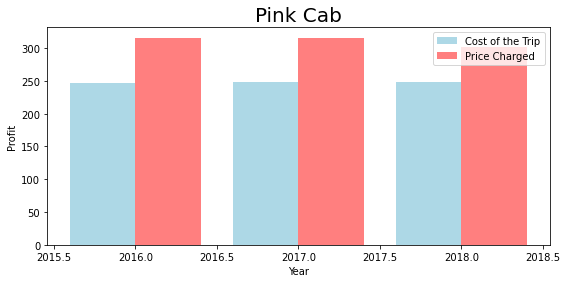

In [51]:
plt.figure(figsize=(9,4))
ax = plt.subplot(111)
ax.bar(plot_1.index-0.2, plot14.values, width=0.4, color='#add8e6', align='center',label='Cost of the Trip')
ax.bar(plot_1.index+0.2, plot13.values, width=0.4, color='#FF7F7F', align='center',label='Price Charged')
plt.ylabel('Profit')
plt.xlabel('Year')
plt.title('Pink Cab', fontsize=20)
plt.legend()
plt.show()

In [52]:
plot_2 =YellowCab.groupby('Year').Transaction_ID.count()
plot15 = YellowCab.groupby('Year').Price_Charged.mean()
plot16 = YellowCab.groupby('Year').Cost_of_Trip.mean()

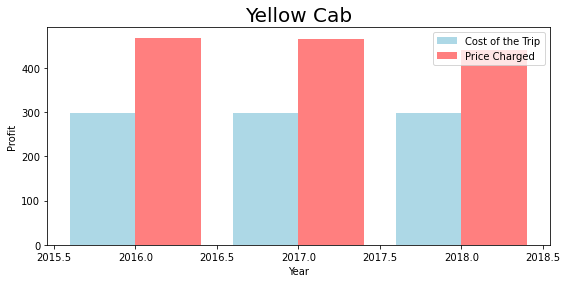

In [53]:
plt.figure(figsize=(9,4))
ax = plt.subplot(111)
ax.bar(plot_2.index-0.2, plot16.values, width=0.4, color='#add8e6', align='center',label='Cost of the Trip')
ax.bar(plot_2.index+0.2, plot15.values, width=0.4, color='#FF7F7F', align='center',label='Price Charged')
plt.ylabel('Profit')
plt.xlabel('Year')
plt.title('Yellow Cab', fontsize=20)
plt.legend()
plt.show()

In [54]:
plot17 = PinkCab.groupby('Gender').Price_Charged.mean()
plot18 = YellowCab.groupby('Gender').Price_Charged.mean()

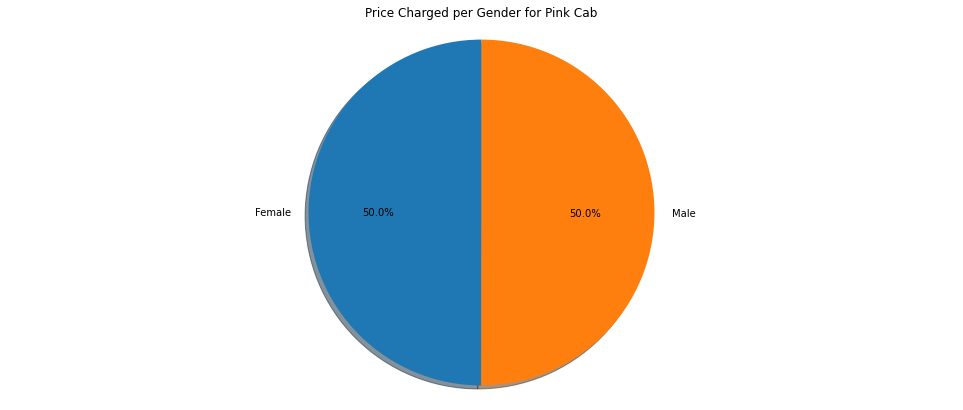

In [55]:
labs = plot17.index
vals = plot17.values
figp, axp = plt.subplots(figsize=(17,7))
axp.pie(vals , labels=labs, autopct='%1.1f%%', shadow=True, startangle=90,)
axp.axis('equal')

plt.title('Price Charged per Gender for Pink Cab')
plt.show()

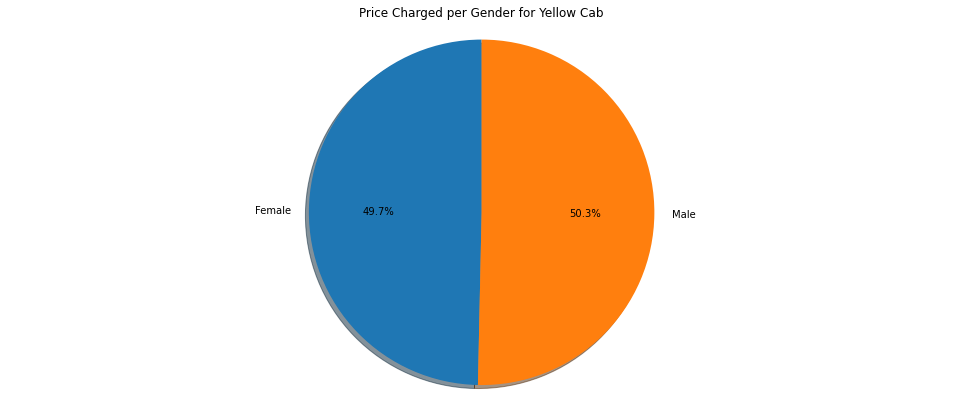

In [56]:
labs = plot18.index
vals = plot18.values
figp, axp = plt.subplots(figsize=(17,7))
axp.pie(vals , labels=labs, autopct='%1.1f%%', shadow=True, startangle=90,)
axp.axis('equal')

plt.title('Price Charged per Gender for Yellow Cab')
plt.show()

In [ ]:
#It can be seen through visuals and data that it is better to invest in Yellow Cab than the Pink Cab.